In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=77)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.92

In [20]:
# Goal is to create a bunch of train/test splits, calcilate the testing accuracy
# for each and average the result! 

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(X_train, y_train)

print(X.shape)

for k, (train, test) in enumerate(kf):
    print('K' ,k , 'train', train[:30], 'test', test[:10])

(150, 4)
K 0 train [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53] test [0 1 2 3 4 5 6 7 8 9]
K 1 train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 48 49 50 51 52 53] test [24 25 26 27 28 29 30 31 32 33]
K 2 train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] test [48 49 50 51 52 53 54 55 56 57]
K 3 train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] test [72 73 74 75 76 77 78 79 80 81]
K 4 train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] test [ 96  97  98  99 100 101 102 103 104 105]


In [44]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [45]:
print(scores.mean())

0.9666666666666668


## Cross Validation for Parameter Tuning

In [46]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [47]:
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

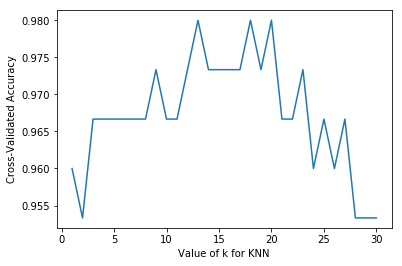

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Model Selection

In [49]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean())

0.9800000000000001


In [ ]:
from sklearn